<a href="https://colab.research.google.com/github/ecemay/week2/blob/main/G2M_investment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#G2M insight for Cab Investment firm

XYZ is a private firm in US. Due to remarkable growth in the Cab Industry in last few years and multiple key players in the market, it is planning for an investment in Cab industry and as per their Go-to-Market(G2M) strategy they want to understand the market before taking final decision.

 ## --------------------------------------------1.Step - Understanding the Data------------------------------------------

Importing the Main Libraries to work with data

In [1]:
#operation
import numpy as np
import pandas as pd


#visualization
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as px


pd.options.display.float_format = '{:.2f}'.format

from datetime import datetime

Importing Data

In [2]:
cab_data = pd.read_csv('https://raw.githubusercontent.com/DataGlacier/DataSets/main/Cab_Data.csv')
city_data = pd.read_csv('https://raw.githubusercontent.com/DataGlacier/DataSets/main/City.csv')
customer_data = pd.read_csv('https://raw.githubusercontent.com/DataGlacier/DataSets/main/Customer_ID.csv')
transaction_data = pd.read_csv('https://raw.githubusercontent.com/DataGlacier/DataSets/main/Transaction_ID.csv')



In [3]:
cab_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.63
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.85
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.63
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.60
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.78


In [6]:
def summary_dataset(df):
    print('+---------------------------------------------+')
    print(f"Dataset Shape               : {df.shape}")
    print('+---------------------------------------------+')
    print(f"Duplicated rows number:     : {df.duplicated().sum()}")
    print('+---------------------------------------------+')
    print(f"Categorical columns number: : {len(df.select_dtypes(include=['object']).columns)}")
    print('+---------------------------------------------+')
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Column Name'] = summary['index']
    summary = summary[['Column Name','dtypes']]
    summary['Missing Value'] = df.isnull().sum().values   
    summary['Uniques'] = df.nunique().values
    summary['Max Value'] = np.array([df[i].max() if  df[i].dtype == int or df[i].dtype == float else  '-' for i in df.columns])
    summary['Min Value'] = np.array([df[i].min() if  df[i].dtype == int or df[i].dtype == float else  '-' for i in df.columns])
    summary['Mean'] = np.array([round(df[i].mean(),2) if  df[i].dtype == int or df[i].dtype ==  float else  '-' for i in df.columns])
    summary['Std'] = np.array([round(df[i].std(),2) if  df[i].dtype == int or df[i].dtype == float else  '-' for i in df.columns])

    return summary

In [22]:
summary_dataset(cab_data)

+---------------------------------------------+
Dataset Shape               : (287084, 7)
+---------------------------------------------+
Duplicated rows number:     : 0
+---------------------------------------------+
Categorical columns number: : 2
+---------------------------------------------+


,Column Name,dtypes,Missing Value,Uniques,Max Value,Min Value,Mean,Std
0,Transaction ID,int64,0,287084,10352868,10000011,10176527.77,101227.61
1,Company,object,0,2,-,-,-,-
2,City,object,0,19,-,-,-,-
3,KM Travelled,float64,0,874,48.0,1.9,22.58,12.23
4,Price Charged,float64,0,95150,2048.03,15.6,431.28,280.71
5,Cost of Trip,float64,0,16212,691.2,19.0,286.61,158.0
6,Date of Travel,datetime64[ns],0,935,-,-,-,-


In [4]:
## import formatted date column
date = pd.read_csv("/content/cab_data.csv")

In [5]:
date = date.assign(result=date['Date;;;;;;'].str.replace(r';;;;;;', ''))

In [8]:
date.rename(columns = {"result":'Date of Travel'}, inplace = True)
date.drop("Date;;;;;;", axis=1, inplace=True)

In [10]:
date.head()

,Date of Travel
0,8.01.2016
1,6.01.2016
2,2.01.2016
3,7.01.2016
4,3.01.2016


In [11]:
cab_data.drop("Date of Travel", axis=1, inplace=True)

In [12]:
cab_data = pd.merge(cab_data, date, left_index=True, right_index=True)

In [14]:
cab_data["Date of Travel"] = pd.to_datetime(cab_data["Date of Travel"] )

In [15]:
cab_data.head()

,Transaction ID,Company,City,KM Travelled,Price Charged,Cost of Trip,Date of Travel
0,10000011,Pink Cab,ATLANTA GA,30.45,370.95,313.63,2016-08-01
1,10000012,Pink Cab,ATLANTA GA,28.62,358.52,334.85,2016-06-01
2,10000013,Pink Cab,ATLANTA GA,9.04,125.20,97.63,2016-02-01
3,10000014,Pink Cab,ATLANTA GA,33.17,377.40,351.60,2016-07-01
4,10000015,Pink Cab,ATLANTA GA,8.73,114.62,97.78,2016-03-01


In [ ]:
customer_data.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [30]:
## Here we realized despite we have two integer column which are population and users columns, it considered as categorical and we can format these colums to use in calculations
#in further steps
city_data['Population'] = city_data['Population'].apply(lambda x: x.replace(",",""))
city_data['Population'] =  pd.to_numeric(city_data['Population'])
city_data['Users'] = city_data['Users'].apply(lambda x: x.replace(",",""))
city_data['Users'] =  pd.to_numeric(city_data['Users'])

In [19]:
summary_dataset(customer_data)

+---------------------------------------------+
Dataset Shape               : (49171, 4)
+---------------------------------------------+
Duplicated rows number:     : 0
+---------------------------------------------+
Categorical columns number: : 1
+---------------------------------------------+


,Column Name,dtypes,Missing Value,Uniques,Max Value,Min Value,Mean,Std
0,Customer ID,int64,0,49171,60000,1,28398.25,17714.14
1,Gender,object,0,2,-,-,-,-
2,Age,int64,0,48,65,18,35.36,12.6
3,Income (USD/Month),int64,0,23341,35000,2000,15015.63,8002.21


In [20]:
summary_dataset(transaction_data)

+---------------------------------------------+
Dataset Shape               : (440098, 3)
+---------------------------------------------+
Duplicated rows number:     : 0
+---------------------------------------------+
Categorical columns number: : 1
+---------------------------------------------+


,Column Name,dtypes,Missing Value,Uniques,Max Value,Min Value,Mean,Std
0,Transaction ID,int64,0,440098,10440108,10000011,10220059.5,127045.49
1,Customer ID,int64,0,49171,60000,1,23619.51,21195.55
2,Payment_Mode,object,0,2,-,-,-,-


In [21]:
summary_dataset(city_data)

+---------------------------------------------+
Dataset Shape               : (20, 3)
+---------------------------------------------+
Duplicated rows number:     : 0
+---------------------------------------------+
Categorical columns number: : 3
+---------------------------------------------+


,Column Name,dtypes,Missing Value,Uniques,Max Value,Min Value,Mean,Std
0,City,object,0,20,-,-,-,-
1,Population,object,0,20,-,-,-,-
2,Users,object,0,20,-,-,-,-


In [32]:
## also we can add a columns as ratio to interpret better users rate by cities independent way from population
city_data["Ratio"] = city_data["Users"] / city_data["Population"]

In [31]:
# we add profit column to cab_data dataframe
cab_data['Profit'] = cab_data['Price Charged'] - cab_data['Cost of Trip']

In [ ]:
summary_dataset(cab_data)

So far, we review our data and format them to make more nested, we checked whether we have any dublicated or missing values in our datasets and understood our data and what informations we have for these companies. After this step we will visiualize our data to understand more and extract some meaningfull informations from our dataset. To do that we will merge some datasets make them more understandable


 ## --------------------------------------------2.Step - Visualization------------------------------------------

Examining profit by Companies and Cities

In [33]:
merged_data = cab_data.merge(city_data, on="City", how="inner")
merged_data = merged_data.merge(transaction_data, on="Transaction ID", how="inner")

In [35]:
summary_dataset(merged_data)

+---------------------------------------------+
Dataset Shape               : (287084, 13)
+---------------------------------------------+
Duplicated rows number:     : 0
+---------------------------------------------+
Categorical columns number: : 3
+---------------------------------------------+


,Column Name,dtypes,Missing Value,Uniques,Max Value,Min Value,Mean,Std
0,Transaction ID,int64,0,287084,10352868,10000011,10176527.77,101227.61
1,Company,object,0,2,-,-,-,-
2,City,object,0,19,-,-,-,-
3,KM Travelled,float64,0,874,48.0,1.9,22.58,12.23
4,Price Charged,float64,0,95150,2048.03,15.6,431.28,280.71
5,Cost of Trip,float64,0,16212,691.2,19.0,286.61,158.0
6,Date of Travel,datetime64[ns],0,935,-,-,-,-
7,Profit,float64,0,249409,1463.9660000000003,-220.06,144.67,166.9
8,Population,int64,0,19,8405837,248968,3091457.65,3295366.08
9,Users,int64,0,19,302149,3643,157707.38,100089.1


In [36]:
profit_city = merged_data.groupby(["Company", "City"]).sum()["Profit"].reset_index(name="Profit")

In [37]:
bar = px.bar(profit_city,
        x = profit_city.City, # index = category name
        y = profit_city.Profit,
        color = "Company", title = "Profit by Cities",
        color_discrete_sequence=['#FF5733', '#C70039'],
        range_y=[0, 10000000])
bar.update_layout(xaxis = {"categoryorder":"total descending"})

bar.show()


According to the bar chart of profit distirbution by cities, we can make 2 inferences
1.   Companies derive most of their income from New York.
2.   Yellow Cab dominate the market




Profit by Year

In [38]:
profit_year = merged_data.groupby(["Company", merged_data["Date of Travel"].dt.year]).sum()["Profit"].reset_index(name="Profit")

In [40]:

fig = px.line(profit_year, x="Date of Travel", y="Profit", color='Company',color_discrete_sequence=['#C70039', '#FF5733'], range_y=[-5000000, 25000000])
fig.update_layout(xaxis = dict(zeroline=True), yaxis = dict(zeroline=True))
fig.layout.xaxis.title.text = "Years"
fig.layout.yaxis.title.text = "Profit"
fig.layout.title.text = "Profit over Years"
fig.show()

According to the line chart of profit distirbution by year, we can make 2 inferences
1.   Yellow company losing value and popularity over the last years.
2.   Pink company stay stable over years. Consistency might be important consideration in terms of investmen 


In [41]:
cost_year = merged_data.groupby([ merged_data["Date of Travel"].dt.year, "Company",]).agg({'Cost of Trip': 'sum', 'Price Charged': 'sum'}).reset_index()

cost_year["cost rate"] = (cost_year["Cost of Trip"]*100 / cost_year["Price Charged"]) 




In [42]:
cost_year

,Date of Travel,Company,Cost of Trip,Price Charged,cost rate
0,2016,Pink Cab,6194968.01,7908479.23,78.33
1,2016,Yellow Cab,24554137.75,38481133.18,63.81
2,2017,Pink Cab,7544974.63,9578629.54,78.77
3,2017,Yellow Cab,29242932.07,45818910.04,63.82
4,2018,Pink Cab,2750144.24,3267138.46,84.18
5,2018,Yellow Cab,11995158.95,18760593.34,63.94


In [44]:

bar = px.bar(cost_year,
        x =cost_year["Date of Travel"], # index = category name
        y =cost_year["cost rate"],
        title = "Cost Profit Rate over Year",
        color = cost_year.Company,
        color_discrete_sequence=['#C70039', '#FF5733'],
        
)


bar.show()

there is no distinc change in cost over year

Although there are changes in the rate, there is no regular increase in the cost profit rate.

In [45]:
nonprofitable_data = cab_data[cab_data["Profit"] <=0 ]
nonprofitable_data = nonprofitable_data.groupby(by=["Company",]).count()["Transaction ID"].reset_index(name="Nonprofit Trip Number")
nonprofitable_data["Total_Trip"] = cab_data.groupby(by=["Company"]).count()["Transaction ID"].reset_index(name="Total_Trip")["Total_Trip"]
nonprofitable_data["Rate of Nonprofitable Rides"] = nonprofitable_data["Nonprofit Trip Number"]*100 / nonprofitable_data["Total_Trip"]
nonprofitable_data.head()

,Company,Nonprofit Trip Number,Total_Trip,Rate of Nonprofitable Rides
0,Pink Cab,9269,66427,13.95
1,Yellow Cab,10191,220657,4.62


In [46]:
bar = px.bar(nonprofitable_data,
        x = nonprofitable_data.Company, # index = category name
        y = nonprofitable_data["Rate of Nonprofitable Rides"],
        title = "Nonprofitable Rides Rate by Cities",
        color_discrete_sequence=['#C70039','#FF5733'],
        color =nonprofitable_data.groupby(by=["Company"]).sum().index
)
bar.update_layout(xaxis = {"categoryorder":"total descending"})

bar.show()

In [ ]:
merged_data.head()

,Transaction ID,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit,Date,Population,Users,Ratio,Customer ID,Payment_Mode,Card Payment
0,10000011,Pink Cab,ATLANTA GA,30.45,370.95,313.63,57.31,2016-02-06,814885,24701,0.03,29290,Card,1
1,10000012,Pink Cab,ATLANTA GA,28.62,358.52,334.85,23.67,2016-02-04,814885,24701,0.03,27703,Card,1
2,10000013,Pink Cab,ATLANTA GA,9.04,125.20,97.63,27.57,2016-01-31,814885,24701,0.03,28712,Cash,0
3,10000014,Pink Cab,ATLANTA GA,33.17,377.40,351.60,25.80,2016-02-05,814885,24701,0.03,28020,Cash,0
4,10000015,Pink Cab,ATLANTA GA,8.73,114.62,97.78,16.84,2016-02-01,814885,24701,0.03,27182,Card,1


In [47]:
city_users = merged_data.groupby(by=["Company","City"]).count()["Customer ID"].reset_index(name="Users Number")

In [48]:
fig = px.pie(labels=city_users.Company, 
             values=city_users["Users Number"],
             title="  Total Users Number by Company",
             names=city_users.Company,
             color_discrete_sequence=['#FF5733', '#C70039'],

        
        
)
fig.update_traces(textposition='inside', textinfo='percent+label', pull=0.05,)

fig.show()

In [52]:
km_year = merged_data.groupby(["Company",  merged_data["Date of Travel"].dt.year]).sum()["KM Travelled"].reset_index(name="KM")


In [54]:
fig = px.line(km_year, x="Date of Travel", y="KM", color='Company',color_discrete_sequence=['#C70039', '#FF5733'])
fig.update_layout(xaxis = dict(zeroline=True), yaxis = dict(zeroline=True))
fig.layout.xaxis.title.text = "Years"
fig.layout.yaxis.title.text = "KM Traveled"
fig.layout.title.text = "KM over Years"
fig.show()

In [ ]:
merged_data.head()

,Transaction ID,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit,Date,Population,Users,Ratio,Customer ID,Payment_Mode
0,10000011,Pink Cab,ATLANTA GA,30.45,370.95,313.63,57.31,2016-02-06,814885,24701,0.03,29290,Card
1,10000012,Pink Cab,ATLANTA GA,28.62,358.52,334.85,23.67,2016-02-04,814885,24701,0.03,27703,Card
2,10000013,Pink Cab,ATLANTA GA,9.04,125.20,97.63,27.57,2016-01-31,814885,24701,0.03,28712,Cash
3,10000014,Pink Cab,ATLANTA GA,33.17,377.40,351.60,25.80,2016-02-05,814885,24701,0.03,28020,Cash
4,10000015,Pink Cab,ATLANTA GA,8.73,114.62,97.78,16.84,2016-02-01,814885,24701,0.03,27182,Card


In [55]:
company_user = merged_data.groupby(by=["Company", merged_data["Date of Travel"].dt.year]).count()["Customer ID"].reset_index(name="User_Number")


In [56]:
bar = px.bar(company_user,
        x = company_user["Date of Travel"], # index = category name
        y = company_user.User_Number,
        color = "Company", title = "User Number by Years",
        color_discrete_sequence=[ '#C70039', '#FF5733'])
bar.update_layout(xaxis = {"categoryorder":"total descending"})

bar.show()

In [59]:
persistence = merged_data.groupby(by=["Customer ID", "Company",  merged_data["Date of Travel"].dt.year]).count()["Transaction ID"].reset_index(name="Ride Number greater than 10")
persistence_customer = persistence[persistence["Ride Number greater than 10"] >5 ]
persistence_customer = persistence.groupby(by=["Company",  merged_data["Date of Travel"].dt.year]).count()["Customer ID"].reset_index(name="Persistence Customer Number")
persistence_customer["User_Number"] = city_users["Users Number"]
persistence_customer["Persistence Rate"] = (persistence_customer["Persistence Customer Number"]*100/ persistence_customer["User_Number"])*1000


In [61]:
bar = px.bar(persistence_customer,
        x = persistence_customer["Date of Travel"], # index = category name
        y = persistence_customer["Persistence Rate"],
        color = "Company", title = "Persistence User Number by Years %1000000",
        color_discrete_sequence=[ '#C70039', '#FF5733'])
bar.update_layout(xaxis = {"categoryorder":"total descending"})

bar.show()

Customer Profile

Income Disturbution

In [62]:
customer_profile= customer_data.merge(merged_data)[["Customer ID", "Transaction ID", "Company", "Gender", "Age", "Income (USD/Month)","City", "Profit","Payment_Mode", "KM Travelled"]]

In [63]:
customer = customer_profile.groupby(by=["Customer ID", "Gender","Company",
                                               "City","Age","Income (USD/Month)"]).agg({'Transaction ID': 'count', 
                                                                                         'Profit': 'mean', 'KM Travelled': 'mean'}).reset_index()
yellow_customer = customer[customer["Company"] == "Yellow Cab"]
pink_customer = customer[customer["Company"] == "Pink Cab"]

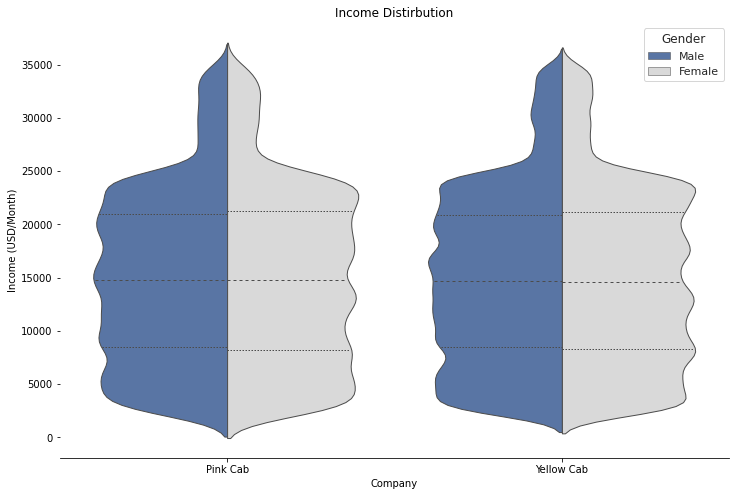

In [64]:
fig, ax = plt.subplots(figsize=(12, 8))

sns.set_theme(style="whitegrid")


# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(data=customer_profile, x="Company", y="Income (USD/Month)", hue="Gender",
               split=True, linewidth=1,
               palette={"Male": "b", "Female": ".85"}, inner="quartile",
               ax=ax)

sns.despine(left=True)

ax.set_title("Income Distirbution")

# Show plot
plt.show()

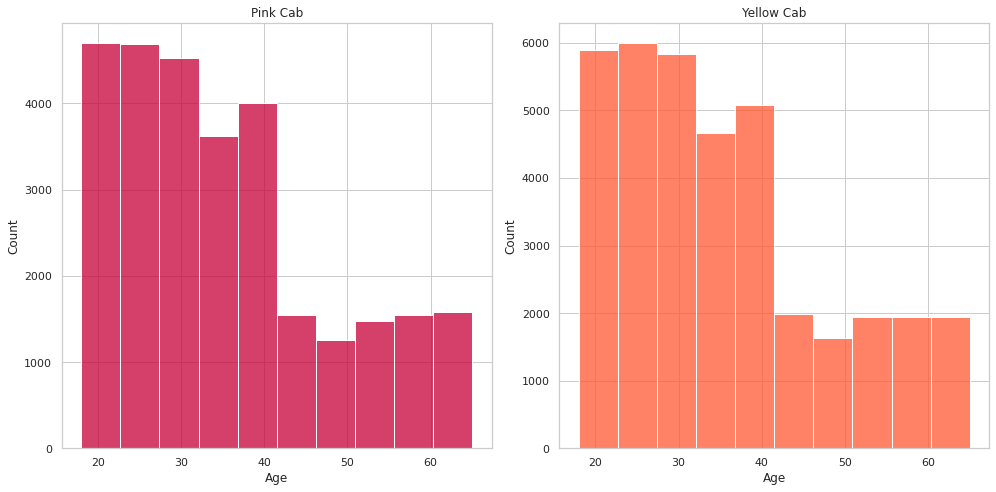

In [65]:
fig, axs = plt.subplots( nrows=1, ncols=2, figsize=(14, 7))
sns.histplot(data=pink_customer, x='Age', bins=10, ax=axs[0], color='#C70039')
axs[0].set_title('Pink Cab')

sns.histplot(data=yellow_customer, x='Age', bins=10,ax=axs[1], color='#FF5733')
axs[1].set_title('Yellow Cab')

plt.tight_layout()
plt.show()

Text(0.5, 0.98, 'Hexbin Plot of Age vs. Profit')

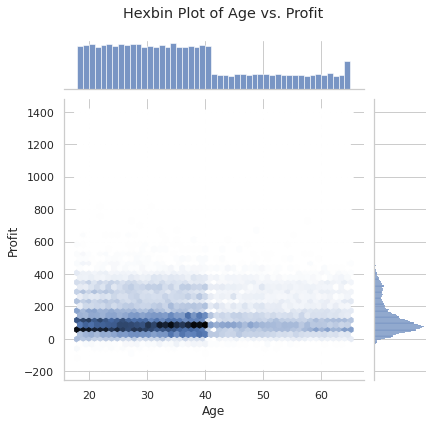

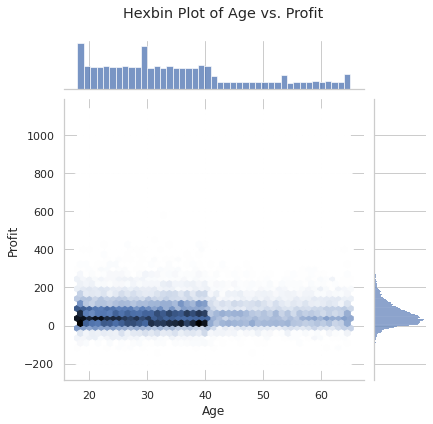

In [66]:
sns.jointplot(x="Age", y="Profit", data=yellow_customer, kind="hex")


plt.subplots_adjust(top=0.9)
plt.suptitle("Hexbin Plot of Age vs. Profit")


sns.jointplot(x="Age", y="Profit", data=pink_customer, kind="hex")

plt.subplots_adjust(top=0.9)


plt.suptitle("Hexbin Plot of Age vs. Profit")

In [67]:
yellow_customer

,Customer ID,Gender,Company,City,Age,Income (USD/Month),Transaction ID,Profit,KM Travelled
1,1,Male,Yellow Cab,NEW YORK NY,36,16359,23,311.17,23.84
3,2,Male,Yellow Cab,NEW YORK NY,31,12069,29,340.84,23.21
5,3,Female,Yellow Cab,NEW YORK NY,27,12968,32,290.17,22.07
7,4,Male,Yellow Cab,NEW YORK NY,33,13803,20,325.14,24.33
9,5,Male,Yellow Cab,NEW YORK NY,24,9965,20,434.09,26.12
...,...,...,...,...,...,...,...,...,...
65848,59996,Male,Yellow Cab,BOSTON MA,51,16634,3,-24.14,13.08
65850,59997,Male,Yellow Cab,BOSTON MA,63,22352,6,57.46,28.23
65852,59998,Female,Yellow Cab,BOSTON MA,23,5678,4,40.47,15.50
65854,59999,Male,Yellow Cab,BOSTON MA,38,24577,4,56.00,21.04


In [68]:
bar = px.bar(customer.groupby(by = ["Gender", "Company"]).sum()["Customer ID"].reset_index(name="Customer Number"),
        x = customer.groupby(by = ["Gender", "Company"]).sum()["Customer ID"].reset_index(name="Customer Number")["Company"], # index = category name
        y = customer.groupby(by = ["Gender", "Company"]).sum()["Customer ID"].reset_index(name="Customer Number")["Customer Number"],
        color = "Gender", title = "Gender Distirbution",
        color_discrete_sequence=['#FF5733', '#C70039'])
bar.update_layout(xaxis = {"categoryorder":"total descending"})

bar.show()

After all these visualizations, we've understood our data and what we need well.
Inferences

1.   Yellow Cab have more customer and profit compared to pink cab
2.   Despite this fact, Yellow cab have decreasing in profit over last years. Profit decreasing is not that high in pink company. So it must be reason of cab vehicle cost in Yellow cab company, rather than fuel cost in Yellow company decreasing of Profit.
3.   In terms of users number, they both dont have critical customer loss over last years.
4.   Customer that use same company five and more times is higher in Yellow cap up to 2018
5.   Cost of Trips is increasing over years
6.   For both cab company, They have customer profile age of +40
7.   Male Female ratio is balanced in both company
8.   Income Distirbution Profile is similiar for both company.







After made these important inferences to know our data well. We collect all usefull informations together and start prepare our date to prepare using for our model.


In [69]:
merged_data.head()
##  We are planing to make a forecast analysis to predict user number and profit and cost for next year. To do that we need make our nested based on date feature. We can convert our data set into time series dataset. First of all we will have two seperate data set for each company

,Transaction ID,Company,City,KM Travelled,Price Charged,Cost of Trip,Date of Travel,Profit,Population,Users,Ratio,Customer ID,Payment_Mode
0,10000011,Pink Cab,ATLANTA GA,30.45,370.95,313.63,2016-08-01,57.31,814885,24701,0.03,29290,Card
1,10000012,Pink Cab,ATLANTA GA,28.62,358.52,334.85,2016-06-01,23.67,814885,24701,0.03,27703,Card
2,10000013,Pink Cab,ATLANTA GA,9.04,125.20,97.63,2016-02-01,27.57,814885,24701,0.03,28712,Cash
3,10000014,Pink Cab,ATLANTA GA,33.17,377.40,351.60,2016-07-01,25.80,814885,24701,0.03,28020,Cash
4,10000015,Pink Cab,ATLANTA GA,8.73,114.62,97.78,2016-03-01,16.84,814885,24701,0.03,27182,Card


In [70]:
merged_data["Card Payment"] = merged_data['Payment_Mode'].replace({'Card': 1, "Cash": 0}) 


In [71]:
merged_data.head()

,Transaction ID,Company,City,KM Travelled,Price Charged,Cost of Trip,Date of Travel,Profit,Population,Users,Ratio,Customer ID,Payment_Mode,Card Payment
0,10000011,Pink Cab,ATLANTA GA,30.45,370.95,313.63,2016-08-01,57.31,814885,24701,0.03,29290,Card,1
1,10000012,Pink Cab,ATLANTA GA,28.62,358.52,334.85,2016-06-01,23.67,814885,24701,0.03,27703,Card,1
2,10000013,Pink Cab,ATLANTA GA,9.04,125.20,97.63,2016-02-01,27.57,814885,24701,0.03,28712,Cash,0
3,10000014,Pink Cab,ATLANTA GA,33.17,377.40,351.60,2016-07-01,25.80,814885,24701,0.03,28020,Cash,0
4,10000015,Pink Cab,ATLANTA GA,8.73,114.62,97.78,2016-03-01,16.84,814885,24701,0.03,27182,Card,1


In [72]:
model_data_yellow =  merged_data[merged_data["Company"] == "Yellow Cab"]
model_data_pink =  merged_data[merged_data["Company"] == "Pink Cab"]
model_data_pink.head()

,Transaction ID,Company,City,KM Travelled,Price Charged,Cost of Trip,Date of Travel,Profit,Population,Users,Ratio,Customer ID,Payment_Mode,Card Payment
0,10000011,Pink Cab,ATLANTA GA,30.45,370.95,313.63,2016-08-01,57.31,814885,24701,0.03,29290,Card,1
1,10000012,Pink Cab,ATLANTA GA,28.62,358.52,334.85,2016-06-01,23.67,814885,24701,0.03,27703,Card,1
2,10000013,Pink Cab,ATLANTA GA,9.04,125.20,97.63,2016-02-01,27.57,814885,24701,0.03,28712,Cash,0
3,10000014,Pink Cab,ATLANTA GA,33.17,377.40,351.60,2016-07-01,25.80,814885,24701,0.03,28020,Cash,0
4,10000015,Pink Cab,ATLANTA GA,8.73,114.62,97.78,2016-03-01,16.84,814885,24701,0.03,27182,Card,1


In [73]:
model_data_yellow = model_data_yellow.drop(["Company", "City", "Population", "Ratio"], axis=1)


In [74]:
model_data_pink = model_data_pink.drop(["Company", "City", "Population", "Ratio", "Payment_Mode"], axis=1)

In [75]:
model_data_yellow = model_data_yellow.groupby(by="Date of Travel").agg({"Transaction ID": "count","Customer ID":"count", "Price Charged": "sum","Cost of Trip":"sum", "Profit":"sum","KM Travelled":"sum", "Card Payment":"sum" })
model_data_pink = model_data_pink.groupby(by="Date of Travel").agg({"Transaction ID": "count","Customer ID":"count", "Price Charged": "sum","Cost of Trip":"sum", "Profit":"sum","KM Travelled":"sum", "Card Payment":"sum" })

In [76]:
model_data_yellow = model_data_yellow.reset_index()
model_data_pink = model_data_pink.reset_index()

In [77]:
model_data_yellow['days of week'] = model_data_yellow['Date of Travel'].dt.dayofweek
model_data_pink['days of week'] = model_data_pink['Date of Travel'].dt.dayofweek

In [78]:
model_data_yellow['day name  of week'] = model_data_yellow['Date of Travel'].dt.day_name()
model_data_pink['day name of week'] = model_data_pink['Date of Travel'].dt.day_name()

In [79]:
summary_dataset(model_data_yellow)

+---------------------------------------------+
Dataset Shape               : (935, 10)
+---------------------------------------------+
Duplicated rows number:     : 0
+---------------------------------------------+
Categorical columns number: : 1
+---------------------------------------------+


,Column Name,dtypes,Missing Value,Uniques,Max Value,Min Value,Mean,Std
0,Date of Travel,datetime64[ns],0,935,-,-,-,-
1,Transaction ID,int64,0,391,874,21,236.0,156.82
2,Customer ID,int64,0,391,874,21,236.0,156.82
3,Price Charged,float64,0,935,436715.98,9379.51,110225.28,76665.27
4,Cost of Trip,float64,0,935,258812.7684,6136.4688,70366.02,46779.57
5,Profit,float64,0,935,177903.2116,2366.356,39859.26,31022.11
6,KM Travelled,float64,0,934,19619.41,449.17,5330.56,3544.84
7,Card Payment,int64,0,289,518,13,141.59,94.68
8,days of week,int64,0,7,6,0,3.0,2.0
9,day name of week,object,0,7,-,-,-,-


In [80]:
summary_dataset(model_data_pink)

+---------------------------------------------+
Dataset Shape               : (935, 10)
+---------------------------------------------+
Duplicated rows number:     : 0
+---------------------------------------------+
Categorical columns number: : 1
+---------------------------------------------+


,Column Name,dtypes,Missing Value,Uniques,Max Value,Min Value,Mean,Std
0,Date of Travel,datetime64[ns],0,935,-,-,-,-
1,Transaction ID,int64,0,192,295,4,71.04,53.46
2,Customer ID,int64,0,192,295,4,71.04,53.46
3,Price Charged,float64,0,935,100734.96,1266.0700000000002,22197.06,18395.45
4,Cost of Trip,float64,0,935,70964.569,837.479,17636.46,13339.31
5,Profit,float64,0,935,32475.307,-102.09599999999992,4560.6,5364.01
6,KM Travelled,float64,0,935,6436.2,79.3,1603.63,1212.77
7,Card Payment,int64,0,139,186,2,42.46,32.23
8,days of week,int64,0,7,6,0,3.0,2.0
9,day name of week,object,0,7,-,-,-,-


In [81]:
model_data_pink.describe()

,Transaction ID,Customer ID,Price Charged,Cost of Trip,Profit,KM Travelled,Card Payment,days of week
count,935.00,935.00,935.00,935.00,935.00,935.00,935.00,935.00
mean,71.04,71.04,22197.06,17636.46,4560.60,1603.63,42.46,3.00
std,53.46,53.46,18395.45,13339.31,5364.01,1212.77,32.23,2.00
min,4.00,4.00,1266.07,837.48,-102.10,79.30,2.00,0.00
25%,33.00,33.00,9444.56,8239.06,1199.90,743.85,20.00,1.00
50%,56.00,56.00,16164.25,13610.17,2466.23,1235.69,33.00,3.00
75%,89.00,89.00,27680.43,21963.52,5850.83,2005.76,53.00,5.00
max,295.00,295.00,100734.96,70964.57,32475.31,6436.20,186.00,6.00


In [82]:
model_data_yellow.describe()

,Transaction ID,Customer ID,Price Charged,Cost of Trip,Profit,KM Travelled,Card Payment,days of week
count,935.00,935.00,935.00,935.00,935.00,935.00,935.00,935.00
mean,236.00,236.00,110225.28,70366.02,39859.26,5330.56,141.59,3.00
std,156.82,156.82,76665.27,46779.57,31022.11,3544.84,94.68,2.00
min,21.00,21.00,9379.51,6136.47,2366.36,449.17,13.00,0.00
25%,122.50,122.50,55477.86,36663.36,18446.15,2774.76,74.00,1.00
50%,171.00,171.00,76003.48,50946.75,25331.07,3859.47,102.00,3.00
75%,323.00,323.00,158896.68,95543.68,59552.02,7248.36,194.50,5.00
max,874.00,874.00,436715.98,258812.77,177903.21,19619.41,518.00,6.00
